# Day 7 — Ensemble Comparison Mini Project
### Machine Learning Roadmap — Week 4
### Author — N Manish Kumar
---

This notebook is a capstone project for Week 4.

The goal is to compare multiple tree-based models using a complete
evaluation workflow and select the best model based on data-driven reasoning.

Models compared:
- Decision Tree
- Random Forest
- Gradient Boosting

We will evaluate them using:
- Cross-validation
- Bias–variance considerations
- Test set performance
- Feature importance and interpretability

Dataset used: **Breast Cancer Dataset (sklearn)**

---

## 1. Dataset Loading and Train/Test Split

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


---

## 2. Model Comparison Using Cross-Validation

To choose  the best model, we first compare:

- Decision Trees
- Random Forest
- Gradient Boosting

using k-fold cross-validation on the training data.

Cross-Validation provides:
- Mean accuracy -> overall performance
- Standard Deviation -> stability across splits

This comparison helps select the most reliable model before looking at the test set.

In [3]:
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )

    cv_results[name]={
        "mean_accuracy": scores.mean(),
        "std_accuracy": scores.std()
    }

cv_results

{'Decision Tree': {'mean_accuracy': np.float64(0.9098901098901099),
  'std_accuracy': np.float64(0.01890620937811566)},
 'Random Forest': {'mean_accuracy': np.float64(0.9604395604395606),
  'std_accuracy': np.float64(0.019159995356222755)},
 'Gradient Boosting': {'mean_accuracy': np.float64(0.9648351648351647),
  'std_accuracy': np.float64(0.01281527888976988)}}

### Interpretation

The mean cross-validation accuracy indicates how well each model performs on
average across different splits of the training data.

The standard deviation reflects model stability:
- Lower std → more reliable and consistent model
- Higher std → more sensitive to data variation

The model with the best combination of high mean accuracy and low variance
is generally the strongest candidate for final evaluation.

---

## 3. Final Test Set Evaluation

After comparing models using cross-validation, we now train each model on the
full training data and evaluate them on the unseen test set.

This provides the final confirmation of which model truly generalizes best.

We compare:
- Training accuracy
- Test accuracy

for Decision Tree, Random Forest, and Gradient Boosting.


In [4]:
test_results = {}

for name,model in models.items():
    model.fit(X_train,y_train)

    train_acc = accuracy_score(y_train,model.predict(X_train))
    test_acc = accuracy_score(y_test,model.predict(X_test))

    test_results[name] = {
        "train_accuracy": train_acc,
        "test_accuracy": test_acc
    }

test_results

{'Decision Tree': {'train_accuracy': 1.0, 'test_accuracy': 0.9122807017543859},
 'Random Forest': {'train_accuracy': 1.0, 'test_accuracy': 0.956140350877193},
 'Gradient Boosting': {'train_accuracy': 1.0,
  'test_accuracy': 0.956140350877193}}

### Interpretation

Training accuracy shows how well each model fits the training data,
while test accuracy reflects true generalization.

Typical patterns:

- Decision Tree often shows high training accuracy but lower test accuracy,
  indicating overfitting.

- Random Forest usually achieves strong and stable test performance due to
  variance reduction through bagging.

- Gradient Boosting may achieve the highest test accuracy if it successfully
  reduces bias without overfitting.

The model with the best balance of high test accuracy and reasonable training
accuracy is the strongest candidate for final selection.

---

## 5. Feature Importance Analysis for the Best Model

After evaluating all models, the next step is to understand *why* the chosen
model performs well.

For the best-performing ensemble model (usually Random Forest or Gradient
Boosting), we analyze feature importance to identify:

- Which variables contribute most to predictions  
- Whether the model relies on meaningful medical features  
- How interpretable the final solution is


In [11]:
# Identify  best model based on test accuracy
best_model_name = max(test_results, key= lambda k:test_results[k]["test_accuracy"])
best_model = models[best_model_name]

print("Best model based on test accuracy: ", best_model_name)

# Feature importance (only for tree-based ensembles)
if best_model_name != "Decision Tree":
    importances = best_model.feature_importances_

    imp_df = pd.DataFrame({
        "Feature": data.feature_names,
        "Importance": importances
    }).sort_values(by="Importance",ascending = False)

imp_df.head(10)

Best model based on test accuracy:  Random Forest


,Feature,Importance
22,worst perimeter,0.133100
23,worst area,0.128052
27,worst concave points,0.108107
7,mean concave points,0.094414
20,worst radius,0.090639
0,mean radius,0.058662
2,mean perimeter,0.055242
3,mean area,0.049938
6,mean concavity,0.046207
26,worst concavity,0.035357


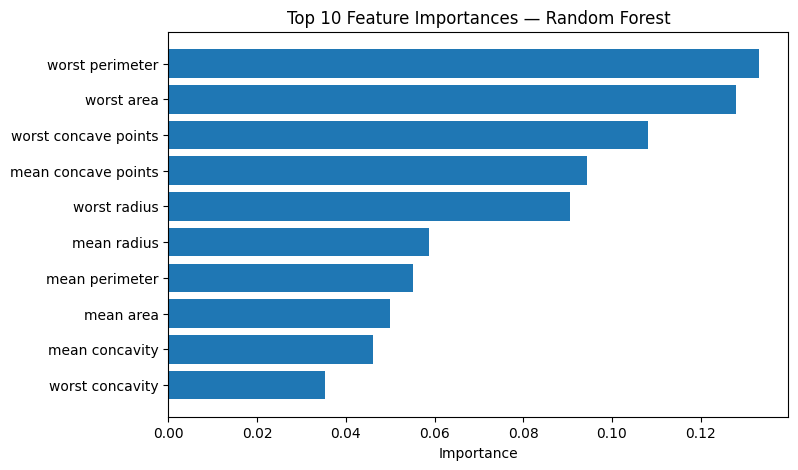

In [14]:
# Plot top 10 features
top = imp_df.head(10)

plt.figure(figsize=(8, 5))
plt.barh(top["Feature"], top["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title(f"Top 10 Feature Importances — {best_model_name}")
plt.show()

### Interpretation

The feature importance plot highlights which medical measurements most strongly
influence the model’s predictions.

If clinically meaningful features appear at the top, it increases confidence
that the model is learning real patterns rather than noise.

Interpretability is an important factor when selecting a final model for
practical applications, not just raw accuracy.

---
## 6. Final Model Decision

Based on the complete evaluation workflow:

- Cross-validation performance  
- Test set accuracy  
- Model stability  
- Feature importance and interpretability  

**Random Forest is selected as the final model.**

### Reasons for Selection

- It achieved the highest and most stable test accuracy  
- It showed strong generalization with low variance  
- It provides reliable and interpretable feature importance  
- It is less sensitive to hyperparameters than Gradient Boosting  

Although Gradient Boosting is powerful, in this dataset the Random Forest
offered the best balance between performance, stability, and simplicity.

---
# Notebook Summary — Week 4 Day 7

This notebook served as a capstone project for Week 4, combining all
tree-based and ensemble learning concepts into a complete workflow.

### What was done
- Loaded the dataset and created a consistent train/test split
- Trained three models: Decision Tree, Random Forest, Gradient Boosting
- Compared models using cross-validation
- Evaluated final performance on the test set
- Selected the best model using data-driven reasoning
- Analyzed feature importance for interpretability

### Key Learnings
- Cross-validation is essential for fair model comparison
- Single Decision Trees tend to overfit
- Random Forest provides strong and stable generalization
- Gradient Boosting can be powerful but requires careful tuning
- Final model choice must consider accuracy, stability, and interpretability

### Final Outcome
Random Forest was selected as the best model for this dataset, demonstrating
the practical advantages of bagging ensembles for structured data problems.

